# Learning and Decision Making

## Laboratory 0: Introduction to scientific computation with Python

Each lab handout will consist of a Jupyter notebook like the present one, and will initiate with the following saying:

_"In the end of the lab, you should export the notebook to a Python script (File >> Download as >> Python (.py)). Make sure that the resulting script includes all code written in the tasks marked as "Activity n. XXX", together with any replies to specific questions posed. Your file should be named `padi-labKK-groupXX.py`, where `KK` corresponds to the lab number and the `XX` corresponds to your group number. Similarly, your homework should consist of a single pdf file named `padi-hwKK-groupXX.pdf`. You should create a zip file with the lab and homework files and submit it in Fenix **at most 30 minutes after your lab is over**._

_Make sure to strictly respect the specifications in each activity, in terms of the intended inputs, outputs and naming conventions._

_In particular, after completing the activities you should be able to replicate the examples provided (although this, in itself, is no guarantee that the activities are correctly completed)."_

Today you can disregard the saying above ☺️

### 1. Basic interaction

When you are programming in a Jupyter notebook such as this, you will observe blocks of text preceeded by `In [ ]:` and `Out [ ]:`. These are blocks where you can insert Python code (the "In" blocks), and whose result you can observe as you press "Shift+Enter" (in the "Out" blocks).

For example, try that in the block below.

In [3]:
s = "Hello, world!"
print(s)

Hello, world!


Since you are programming in Python, all your standard primitives are available. You can use conditionals, cycles, inputs and outputs, etc. You also have available all standard Python modules.

In [2]:
import math

a = 0

# Print a radian --> degree conversion table
while a < 2 * math.pi: 
    print(a, "radians correspond to", a * 180 / math.pi, "degrees.")
    a = a + 0.5

a = input("Please insert a number:\n>> ")

for i in range(5):
    a = math.sqrt(float(a))
    print("Next square root:", a)

if a > 1:
    print(a, "is larger than 1.") 
else: 
    print(a, "is smaller than or equal to 1.")

0 radians correspond to 0.0 degrees.
0.5 radians correspond to 28.64788975654116 degrees.
1.0 radians correspond to 57.29577951308232 degrees.
1.5 radians correspond to 85.94366926962348 degrees.
2.0 radians correspond to 114.59155902616465 degrees.
2.5 radians correspond to 143.2394487827058 degrees.
3.0 radians correspond to 171.88733853924697 degrees.
3.5 radians correspond to 200.53522829578813 degrees.
4.0 radians correspond to 229.1831180523293 degrees.
4.5 radians correspond to 257.8310078088705 degrees.
5.0 radians correspond to 286.4788975654116 degrees.
5.5 radians correspond to 315.1267873219528 degrees.
6.0 radians correspond to 343.77467707849394 degrees.


: 

And, of course, you can define functions.

In [10]:
import numpy as np

q = np.array([[1, 0, 0, 0, 0, 0, 0],
              [0, 1/4, 1/4, 1/4, 0, 0, 1/4],
              [1/2, 0, 0, 0, 0, 1/2, 0],
              [1/2, 0, 0, 0, 1/2, 0, 0],
              [1/2, 0, 0, 0, 0, 1/2, 0],
              [0, 0, 1/2, 0, 0, 1/2, 0],
              [0, 1/3, 0, 1/3, 1/3, 0, 0]])

def stationary_dist(m_tuple):
    matrix = m_tuple
    transpose = matrix.T
    
    left = np.linalg.eig(transpose)[1][:,0].T.real
    left_sum = np.sum(left)
    
    return left / left_sum

print(stationary_dist(q))



LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

One important aspect that you should keep in mind is that running a notebook such as this one essentially corresponds to a sequential interaction with the Python interpreter---namely, the same scope rules apply. In particular, if you define a variable in a certain "In" block and run that block, that same variable will be accessible in posterior evaluations. Therefore, to avoid strange outputs resulting from "legacy" evaluations make sure that you evaluate the "In" blocks in sequence (by pressing Shift+Enter in each block) from scratch.

In [4]:
print("The variable s is accessible here:", s)

The variable s is accessible here: Hello, world!


### 2. Matrices

In your scientific computation you will use three main python libraries: **numpy**, **scipy** and **matplotlib**. The first contains a large collection of numeric types and functions, particularly for matrix manipulation. The second contains a large number of scientific computation utilities (such as optimization sub-modules, etc.). Finally, the third includes plotting functionalities. 

Your work in these labs will involve some level of data manipulation which is done, essentially, in the form of matrix manipulation. In particular, you will use the vast number of matrix manipulation operations offered by **numpy** that, if used proficiently, render computations significantly faster.

Matrices in **numpy** are represented by the type `numpy.array`. The array is initialized as a list of lists, each corresponding to a row of the matrix. There are also several commands to create particular
matrices, such as the identity (`eye`), an all-zeros matrix (`zeros`) or an all-ones matrix (`ones`). Note that, although a `numpy.matrix` type also exists, **we will not use it** and rather rely on the simpler `numpy.array`.

In [5]:
import numpy as np

A1 = np.array([[1, 2, 3], [4, 5, 6]])
print("2 x 3 array of numbers:")
print(A1)
print("This array is of dimension", A1.shape)

2 x 3 array of numbers:
[[1 2 3]
 [4 5 6]]
This array is of dimension (2, 3)


In [6]:
A2 = np.eye(3)
print("3 x 3 identity:")
print(A2)
print("This array is of dimension", A2.shape)

3 x 3 identity:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
This array is of dimension (3, 3)


In [7]:
A3 = np.zeros((2, 3))
print("2 x 3 array of zeros:")
print(A3)
print("This array is of dimension", A3.shape)

2 x 3 array of zeros:
[[0. 0. 0.]
 [0. 0. 0.]]
This array is of dimension (2, 3)


In [8]:
A4 = np.ones(4);
print("4 x 0 array of ones (note how there is no second dimension):")
print(A4)
print("This array is of dimension", A4.shape)

4 x 0 array of ones (note how there is no second dimension):
[1. 1. 1. 1.]
This array is of dimension (4,)


You can now easily perform standard algebraic operations, such as matrix sums or products. You can also perform indexing, slicing, and other operations, as illustrated in the following examples.

In [9]:
# = Matrix creation = #

A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("3 x 3 matrix:")
print(A)

# You can explicitly indicate the array data type with the optional argument "dtype"
print(A.dtype)

A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype='float64')
print(A)
print(A.dtype)

3 x 3 matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
int32
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
float64


In [10]:
B = np.arange(1,4)
print("Vector with all numbers between 1 and 3:")
print(B)

Vector with all numbers between 1 and 3:
[1 2 3]


In [11]:
C = np.diag(B)
print("Diagonal matrix built from the vector B:")
print(C)

Diagonal matrix built from the vector B:
[[1 0 0]
 [0 2 0]
 [0 0 3]]


In [12]:
# = Matrix operations = #

# Sum
D = A + np.eye(3)
print("A + I:")
print(D)

A + I:
[[ 2.  2.  3.]
 [ 4.  6.  6.]
 [ 7.  8. 10.]]


In [13]:
# Vector transpose and regular matrix product
E = np.dot(A, B.T)
print("A * B':")
print(E)

A * B':
[14. 32. 50.]


In [14]:
# Matrix inverse
F = np.linalg.inv(D)
print("inv(D):")
print(F)

inv(D):
[[-6.00000000e+00 -2.00000000e+00  3.00000000e+00]
 [-1.00000000e+00  5.00000000e-01 -2.33146835e-16]
 [ 5.00000000e+00  1.00000000e+00 -2.00000000e+00]]


In [15]:
# = Matrix concatenation = #

G = np.append([1, 2, 3], A)
print("Append matrix A to vector [1, 2, 3]:")
print(G)

Append matrix A to vector [1, 2, 3]:
[1. 2. 3. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [16]:
# When the axis to append is specified, the 
# matrices/vectors must have the correct shape

H1 = np.append(A, [[10, 11, 12]], axis = 0)
H2 = np.append(A, [[4], [7], [10]], axis = 1)
print("Append [10, 11, 12] to A:")
print(H1)

print("Append [[4], [7], [10]] to A:")
print(H2)

Append [10, 11, 12] to A:
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]
Append [[4], [7], [10]] to A:
[[ 1.  2.  3.  4.]
 [ 4.  5.  6.  7.]
 [ 7.  8.  9. 10.]]


In [ ]:
# = Matrix indexing = #

# Simple indexing
print("A[0]:", A[0])
print("A[1]:", A[1])
print("A[1, 2]:", A[1, 2])  # More efficient
print("A[0][2]:", A[0][2])  # Less efficient

In [17]:
# -- Slicing

# Rows between 1 and 2 (excluding the latter), 
# columns between 0 and 1 (excluding the latter)
print("A[1:2,0:1]:", A[1:2,0:1])

# All rows except the last two,
# every other column
print("A[:-2,::2]:", A[:-2,::2]) 

I = np.arange(10, 1, -1)
print("Vector I, with numbers between 10 and 1:")
print(I)

A[1:2,0:1]: [[4.]]
A[:-2,::2]: [[1. 3.]]
Vector I, with numbers between 10 and 1:
[10  9  8  7  6  5  4  3  2]


In [18]:
# -- Matrices as indices

# Indexing with a list
print("I[[3, 3, 1, 8]]:", I[[3, 3, 1, 8]])

# Indexing with an np.array
print("I[np.array([3, 3, -3, 8])]:", I[np.array([3, 3, -3, 8])])

# Indexing with an 2D np.array
print("I[np.array([[1, 1], [2, 3]])]:", I[np.array([[1, 1], [2, 3]])])

I[[3, 3, 1, 8]]: [7 7 9 2]
I[np.array([3, 3, -3, 8])]: [7 7 4 2]
I[np.array([[1, 1], [2, 3]])]: [[9 9]
 [8 7]]


Several observations are in order:

* The function `diag` can be used to build a diagonal matrix from a vector or extract a diagonal from a matrix. You can know more about this (and other) functions in numpy in the corresponding documentation or by using the help function. For example, to know more about the `diag` function, you can type `help("numpy.diag")` in the Python prompt, to get something like:

```
>>> help("numpy.diag")
Help on function diag in numpy:

numpy.diag = diag(v, k=0)
    Extract a diagonal or construct a diagonal array.
    
    See the more detailed documentation for ``numpy.diagonal`` if you use this
    function to extract a diagonal and wish to write to the resulting array;
    whether it returns a copy or a view depends on what version of numpy you
    are using.
    
    Parameters
    ----------
    v : array_like
        If `v` is a 2-D array, return a copy of its `k`-th diagonal.
        If `v` is a 1-D array, return a 2-D array with `v` on the `k`-th
        diagonal.
    k : int, optional
        Diagonal in question. The default is 0. Use `k>0` for diagonals
        above the main diagonal, and `k<0` for diagonals below the main
        diagonal.
    
    Returns
    -------
    out : ndarray
        The extracted diagonal or constructed diagonal array.
    
    See Also
    --------
    diagonal : Return specified diagonals.
    diagflat : Create a 2-D array with the flattened input as a diagonal.
    trace : Sum along diagonals.
    triu : Upper triangle of an array.
    tril : Lower triangle of an array.
    
    Examples
    --------
    >>> x = np.arange(9).reshape((3,3))
    >>> x
    array([[0, 1, 2],
           [3, 4, 5],
           [6, 7, 8]])
    
    >>> np.diag(x)
    array([0, 4, 8])
    >>> np.diag(x, k=1)
    array([1, 5])
    >>> np.diag(x, k=-1)
    array([3, 7])
    
    >>> np.diag(np.diag(x))
    array([[0, 0, 0],
           [0, 4, 0],
           [0, 0, 8]])
```

* You can add, multiply, transpose, invert matrices much as you would in linear algebra
* Indexing and slicing are quite powerful operations. For example, you can use a matrix to index another.

The ability to leverage the powerful indexing and vectorization capabilities of **numpy** is key to producing efficient code. It takes some time to get used to this programming philosophy, but once you do, you will notice an  improvement in the performance of your code. The impact of good vectorization in the efficiency of your code is illustrated in the following example.

In [19]:
import numpy.random as rnd
import time

A = rnd.rand(1000,1000)
B = rnd.rand(1000,1000);
C = np.zeros((1000,1000));

t = time.time()

for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        C[i, j] = A[i, j] + B[i, j]
    
t1 = time.time() - t

t = time.time()
C = A + B;
t2 = time.time() - t

print("Computation time with cycle (in seconds):", t1)
print("Computation time with numpy operation (in seconds):", t2)

Computation time with cycle (in seconds): 0.6058597564697266
Computation time with numpy operation (in seconds): 0.0044956207275390625


Besides illustrating the importance of optimizing your code to take full advantage of its matrix manipulation capabilities, the previous example introduces several additional elements of the **numpy** syntax, such as the `rand` function from the **numpy.random** module.

The labs will consist of activities, marked in blocks titled **Activity XXX** like the one below. The activities in the lab today are just for fun---think of them as puzzles that allow you to practice some `numpy` programming. As such, no submission is necessary.

---

#### Activity 1.  Cycles vs vectorized operations      

Compare the time necessary to compute the sum of two 100,000 &times; 1 random vectors using:

* a for loop;
* a vectorized operation.

---

In [20]:
import numpy.random as rnd
import numpy as np
import time

A = rnd.rand(100_000)

t = time.time()

sum = 0
for i in A:
    sum += i
t1 = time.time() - t

t = time.time()
sum = np.sum(A)
t2 = time.time() - t

print("Computation time with cycle (in seconds):", t1)
print("Computation time with numpy operation (in seconds):", t2)

49886.82667347267
49886.826673472955
Computation time with cycle (in seconds): 0.027324199676513672
Computation time with numpy operation (in seconds): 0.0012798309326171875


---

#### Activity 2. Mountain car problem

Consider a car with a weak engine going up a tall mountain, as depicted in the following diagram:

<img src="mountain-car.png">

The velocity of the car is given by

$$v(t+1)=v(t)-\frac{1}{400}\cos(3p(t))+\frac{u(t)}{1000},\qquad v(t)\in[-0.07,0.07]$$

where $p(t)$ is the position of the car at time step $t$ and $u(t)$ is the acceleration action, which can be $1$ (positive acceleration), $0$ (do nothing) or $-1$ (negative acceleration). The position of the car, in turn, is given by

$$p(t+1)=p(t)+v(t+1),\qquad p(t)\in[-1.2,0.6].$$

Suppose that the car starts at position $p(0)=-\pi/3+0.6$ with a velocity of $v(0)=0$. 

Simulate a 1000-step trajectory of the car when $u(t)=1$ (always accelerate) for $t=0,\ldots,1000$. To do so, build a for loop from $t=0$ to $t=1000$ and use the equations above to compute $p(t)$ and $v(t)$. 

**Note:** Store all values of $p$ and $v$. Also, make sure that $p$ and $v$ stay within the provided bounds.

---

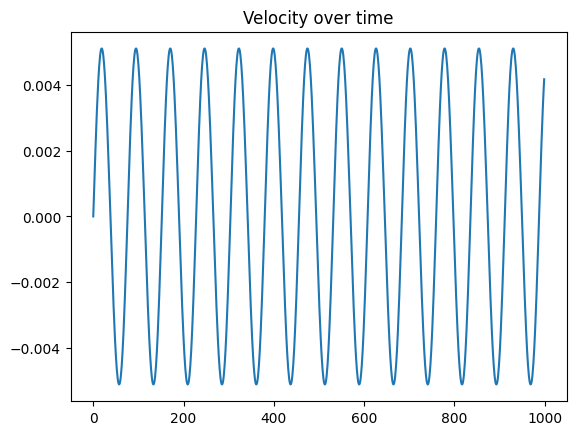

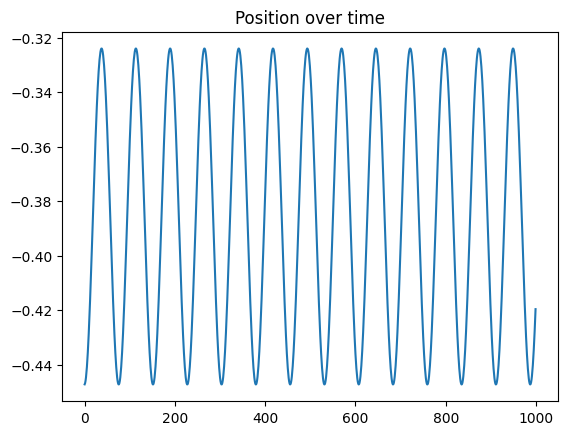

In [24]:
def vel_pos(v, p, u):
    '''
    :param v: velocity at timepoint t
    :param p: position at timepoint t
    :param u: acceleration at timepoint t
    :return:  velocity and position in timepoint t+1
    '''
    v_p = v - (1./400) * np.cos(3*p) + u/1000
    p_p = p + v_p

    return v_p, p_p


p_0 = -np.pi/3 + 0.6
v_0 = 0
u = 1.

res = np.zeros((1000, 3))

res[0,:] = v_0, p_0, 0

for i in range(999):
    v_p, p_p = vel_pos(res[i,0], res[i,1], u)
    res[i+1, :] = v_p, p_p, i+1

import matplotlib.pyplot as plt
plt.plot(res[:, 2], res[:, 0])
plt.title("Velocity over time")
plt.show()
plt.cla()
plt.plot(res[:, 2], res[:, 1])
plt.title("Position over time")
plt.show()

---

#### Activity 3. Mountain car problem (cont.)

Suppose now that, at each step $t$, the car driver selects $u(t)=1$ with probability $0.7$, $u(t)=0$ with probability $0.2$, and $u(t)=-1$ with probability $0.1$. Repeat Activity 2.

**Note:** You may find useful the function `choice` from the module `numpy.random`.

---

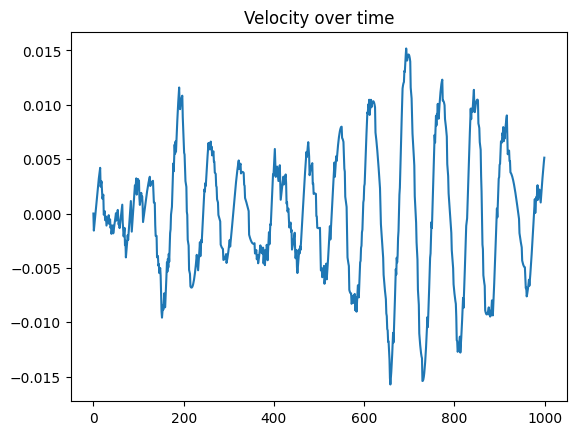

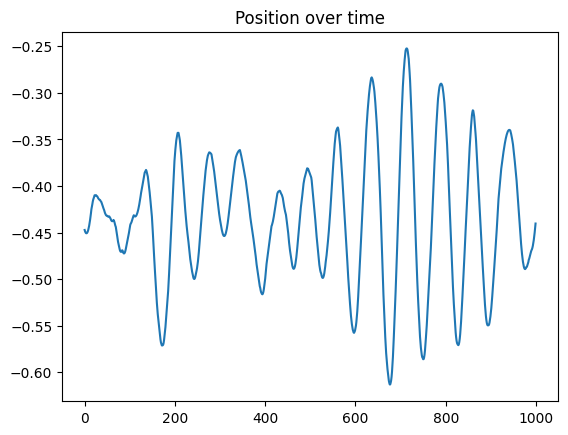

In [23]:
def vel_pos(v, p):
    '''
    :param v: velocity at timepoint t
    :param p: position at timepoint t
    :return:  velocity and position in timepoint t+1
    '''
    u = np.random.choice([1., 0., -1.], p=[.7, .2, .1])
    v_p = v - (1./400) * np.cos(3*p) + u/1000
    p_p = p + v_p

    return v_p, p_p


p_0 = -np.pi/3 + 0.6
v_0 = 0
u = 1.

res = np.zeros((1000, 3))

res[0,:] = v_0, p_0, 0

for i in range(999):
    v_p, p_p = vel_pos(res[i,0], res[i,1])
    res[i+1, :] = v_p, p_p, i+1

import matplotlib.pyplot as plt
plt.plot(res[:, 2], res[:, 0])
plt.title("Velocity over time")
plt.show()
plt.cla()
plt.plot(res[:, 2], res[:, 1])
plt.title("Position over time")
plt.show()

### 3. Plotting

The Python module **matplotlib** offers a number of plotting routines that are ideal to display scientific data. The following generates 100 perturbed samples from the function

$$f(x) = 2x$$

and uses these samples to estimate the function $f$.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Create data
x = 100 * rnd.rand(100, 1)
y = 2 * x + 10 * rnd.randn(100, 1)

# Estimate linear relation between X and Y

X = np.append(x, np.ones((100,1)), axis = 1)

f_est = np.dot(np.linalg.pinv(X), y)
y_est = np.dot(X, f_est)

# Plot commands

plt.figure()
plt.plot(x, y_est)
plt.plot(x, y, 'x')

plt.xlabel('Input X');
plt.ylabel('Output Y');

plt.title('Linear regression');

Consider more carefully the piece of code above, where we included line numbers for easier reference.

* On lines 5 and 6, the vectors *x* and *y* are created, using mostly functionalities that you already encountered in Sections 1 and 2. The novelty is the function `randn` which is similar to the function `rand` except on their underlying distribution: while `rand` generates random numbers uniformly from the interval [0, 1], `randn` generates normally distributed random numbers with mean 0 and a standard deviation of 1.

* Lines 10-13 estimate a linear relation between *x* and *y* using the data already created. Do not worry about the actual computations, and simply observe the use of matrix concatenation in line 10, and the `pinv` function in line 12. The function `pinv` computes the Moore-Penrose pseudo-inverse of a matrix (you can find more infor, for example, in [Wikipedia](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse))

* Lines 17 through 24 contain the actual plotting commands. In particular:

  * The figure command in line 17 creates a new figure.

  * The plot command in line 18 is responsible for displaying the continuous line in the plot. In here, it is used with its most basic syntax. However, the plot command has a very rich syntax, and you can type `help("mplotlib.pyplot.plot")` to know more about this useful function.
  
  * The plot command in line 19 plots the original data. Note how the line specification 'x' indicates that, unlike the plot in line 18, this data should not be plotted continuously but instead marking each data-point with an "&times;".
  
* Finally, the commands in lines 21 to 24 are used to include additional information in the plot, such as the labels for both axis and the title for the plot.

---

#### Activity 4. Mountain car problem (cont.)

Plot in the same axis the position $p$ of the car as a function of $t$ as observed in Activities 2 and 3. What do you observe?

---

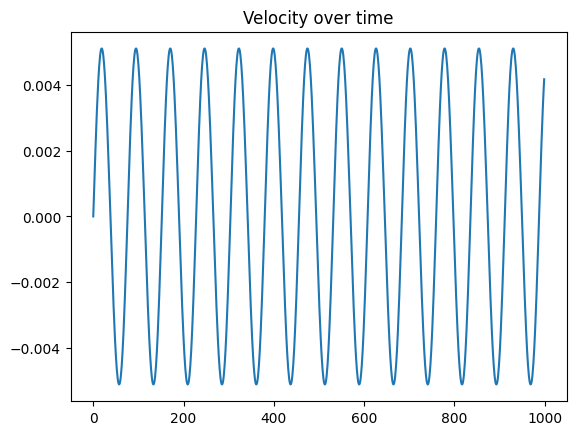

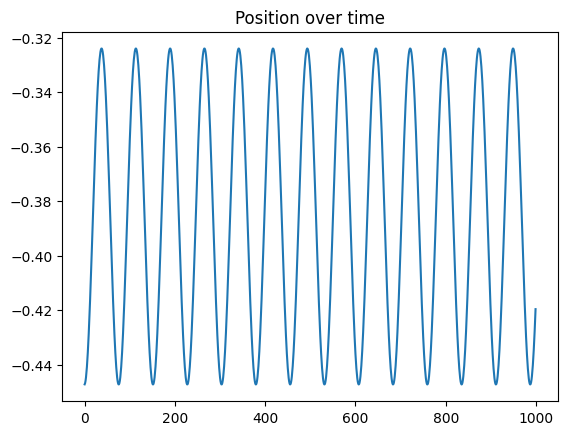

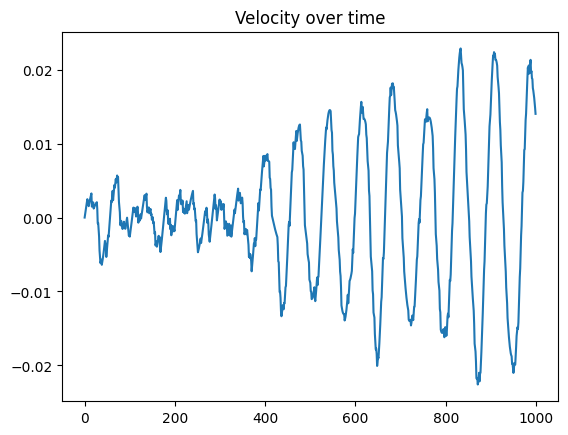

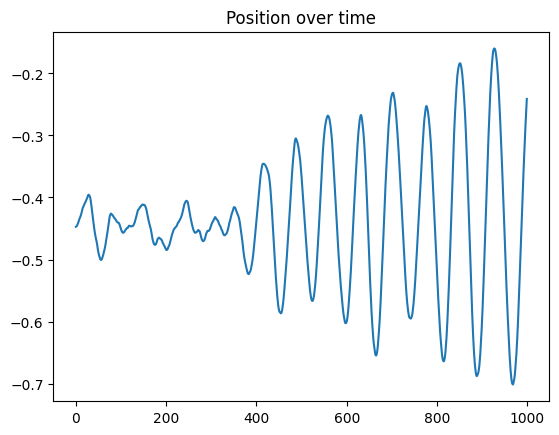

In [28]:
# Activity 2:
def vel_pos(v, p, u):
    '''
    :param v: velocity at timepoint t
    :param p: position at timepoint t
    :param u: acceleration at timepoint t
    :return:  velocity and position in timepoint t+1
    '''
    v_p = v - (1./400) * np.cos(3*p) + u/1000
    p_p = p + v_p

    return v_p, p_p


p_0 = -np.pi/3 + 0.6
v_0 = 0
u = 1.

res = np.zeros((1000, 3))

res[0,:] = v_0, p_0, 0

for i in range(999):
    v_p, p_p = vel_pos(res[i,0], res[i,1], u)
    res[i+1, :] = v_p, p_p, i+1

import matplotlib.pyplot as plt
plt.plot(res[:, 2], res[:, 0])
plt.title("Velocity over time")
plt.show()
plt.cla()
plt.plot(res[:, 2], res[:, 1])
plt.title("Position over time")
plt.show()

# Activity 3
def vel_pos(v, p):
    '''
    :param v: velocity at timepoint t
    :param p: position at timepoint t
    :return:  velocity and position in timepoint t+1
    '''
    u = np.random.choice([1., 0., -1.], p=[.7, .2, .1])
    v_p = v - (1./400) * np.cos(3*p) + u/1000
    p_p = p + v_p

    return v_p, p_p


p_0 = -np.pi/3 + 0.6
v_0 = 0
u = 1.

res = np.zeros((1000, 3))

res[0,:] = v_0, p_0, 0

for i in range(999):
    v_p, p_p = vel_pos(res[i,0], res[i,1])
    res[i+1, :] = v_p, p_p, i+1

import matplotlib.pyplot as plt
plt.plot(res[:, 2], res[:, 0])
plt.title("Velocity over time")
plt.show()
plt.cla()
plt.plot(res[:, 2], res[:, 1])
plt.title("Position over time")
plt.show()

<font color='blue'> The position of the car from activity 2 simply oscillates predictably. The car from activity 3 starts of in a pretty unpredictable way and then settles to a more stable oscillation. </font>

---

#### Activity 5. Mountain car problem (conc.)

Suppose now that the driver selects $u(t)=-1$ until it reaches the position $p(t)=-0.85$ and then selects $u(t)=1$. Repeat Activity 2 and plot the three trajectories you obtained. What can you observe?

---

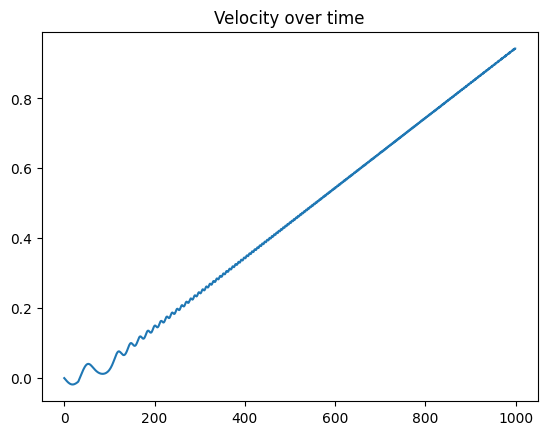

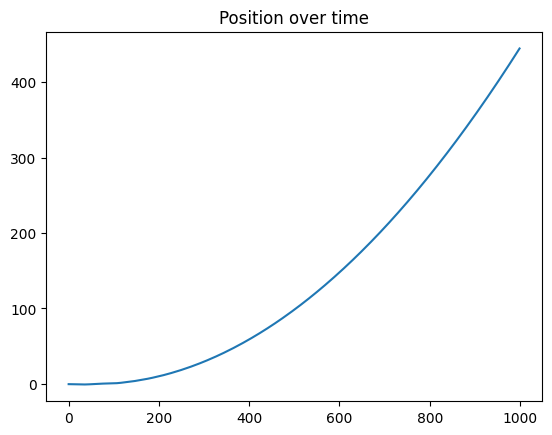

In [27]:
u = -1.

def vel_pos(v, p):
    '''
    :param v: velocity at timepoint t
    :param p: position at timepoint t
    :return:  velocity and position in timepoint t+1
    '''
    global u

    v_p = v - (1./400) * np.cos(3*p) + u/1000
    p_p = p + v_p

    if p_p <= -0.85:
        u = 1.

    return v_p, p_p


p_0 = -np.pi/3 + 0.6
v_0 = 0

res = np.zeros((1000, 3))

res[0,:] = v_0, p_0, 0

for i in range(999):
    v_p, p_p = vel_pos(res[i,0], res[i,1])
    res[i+1, :] = v_p, p_p, i+1

import matplotlib.pyplot as plt
plt.plot(res[:, 2], res[:, 0])
plt.title("Velocity over time")
plt.show()
plt.cla()
plt.plot(res[:, 2], res[:, 1])
plt.title("Position over time")
plt.show()



##### Answer for activity 4 question:
The speed starts increasing linearly after hitting the -0.85 point. Therefore, the distance starts increasing quadratically.

---

#### Activity 5

Export your file as a Python script. In particular:

* Go to the menu "**File**", select the option "**Download as &#x27A4;**" and then "**Python (.py)**".
* Name your file `padi-lab0-groupXXX.py`, where you replace `XXX` by your group number.

Open the resulting Python file. Note that all the markdown in this notebook is converted to comments in the resulting Python file. 

* Delete **all** comments in the Python file, keeping only the "pure" Python code and the comments corresponding to your text answers. 
* Delete all prints and sanity checks you included in the code.

At some point in the python file, you will find the line:

`get_ipython().run_line_magic('matplotlib', 'notebook')`

This is a line used by Jupyter and which will yield an error if the Python script is executed as is. 

* Remove the aforementioned line.
* Run the resulting file. To do so, you can open a terminal window and execute the shell command `python padi-lab0-groupXXX.py`. Verify that everything works properly. 

In future labs, you should always follow these steps to make sure that everything works properly before submitting a lab assignment.

---